# End to End Time Series forecasting using ARIMA

In [1]:
#Changing working directory
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

C:\Users\manis\OneDrive\Documents\Python


In [2]:
from IPython.display import Image
# Image(filename='Capture.png') 

In [3]:
#Data Import and cleaning

In [4]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('AAPL.csv')
TempData.head(30)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-04,14.810000,14.617143,14.642857,14.765714,2.600220e+08,12.718646
1,2012-01-05,14.948214,14.738214,14.819643,14.929643,2.712696e+08,12.859850
2,2012-01-06,15.098214,14.972143,14.991786,15.085714,3.182928e+08,12.994284
3,2012-01-09,15.276786,15.048214,15.196429,15.061786,3.940244e+08,12.973674
4,2012-01-10,15.214286,15.053571,15.211071,15.115714,2.581964e+08,13.020121
5,2012-01-11,15.101786,14.975357,15.095714,15.091071,2.150848e+08,12.998899
6,2012-01-12,15.103571,14.955357,15.081429,15.049643,2.125872e+08,12.963211
7,2012-01-13,15.016071,14.952143,14.989286,14.993214,2.260216e+08,12.914607
8,2012-01-17,15.213929,15.105714,15.150000,15.167857,2.428972e+08,13.065036
9,2012-01-18,15.338214,15.225000,15.248571,15.325357,2.767912e+08,13.200701


In [5]:
#Data Cleaning
HCLTechStockData = TempData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)
  
HCLTechStockData = HCLTechStockData["Close"]
HCLTechStockData.describe()

count    2347.000000
mean       42.024347
std        29.277501
min        13.947500
25%        23.096071
50%        31.112499
75%        48.165001
max       143.160004
Name: Close, dtype: float64

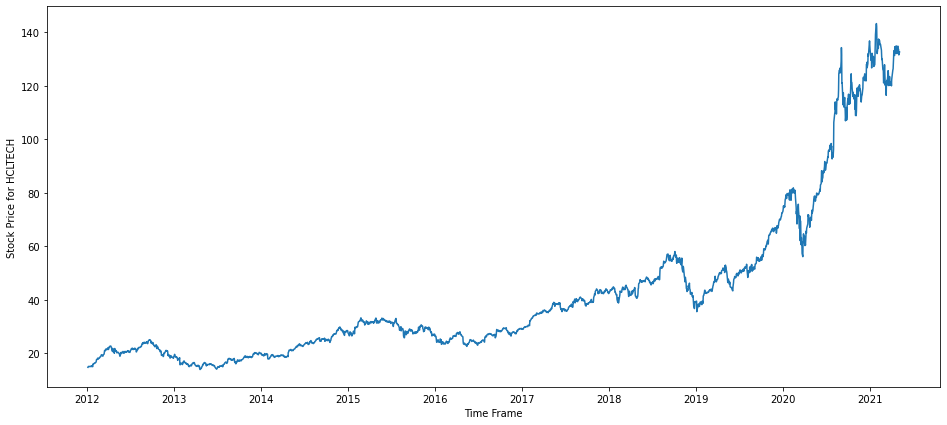

In [6]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

In [7]:
# Checking stationarity

In [8]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

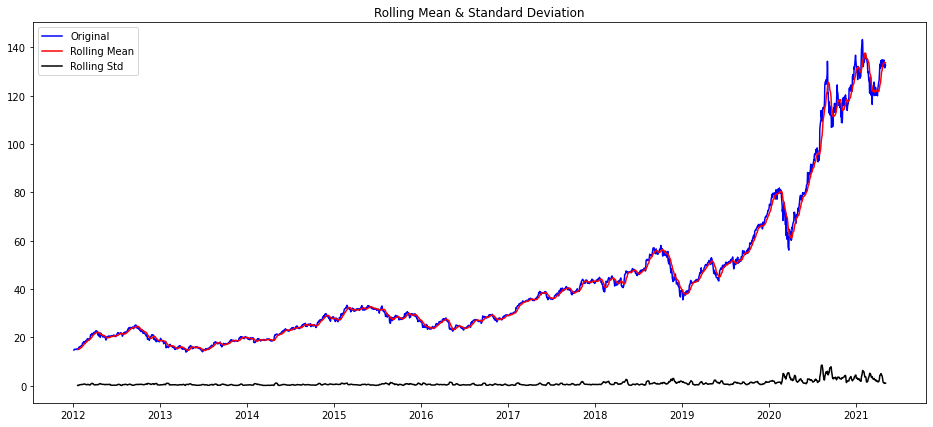

In [9]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# making Series Stationary

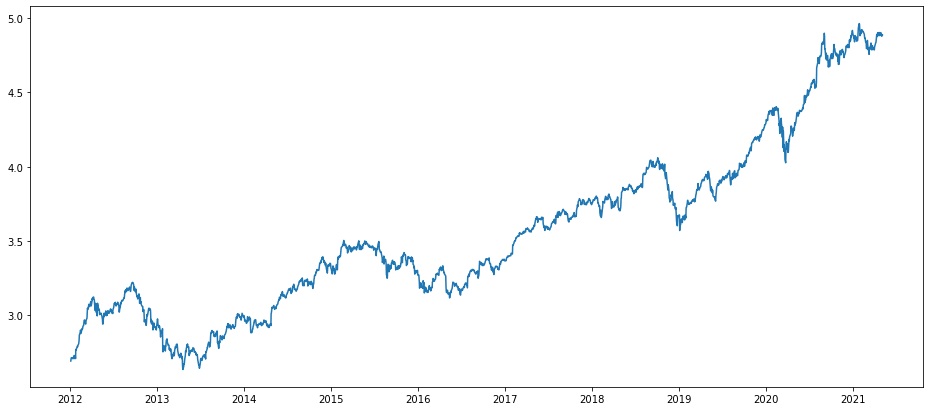

In [10]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

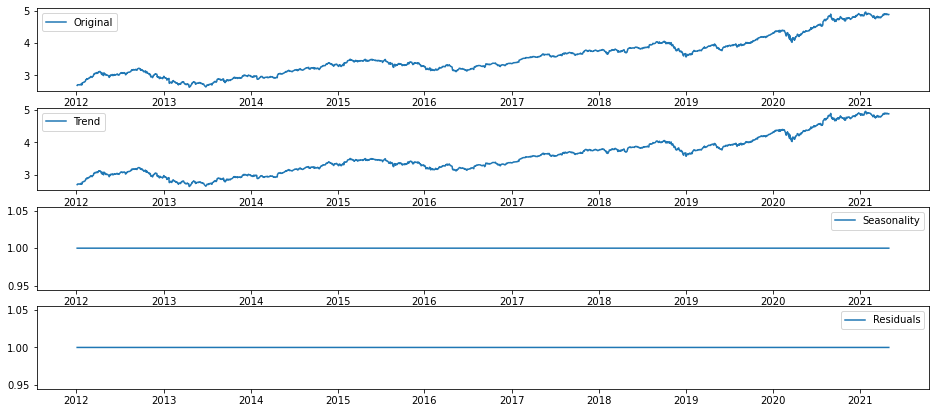

In [11]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

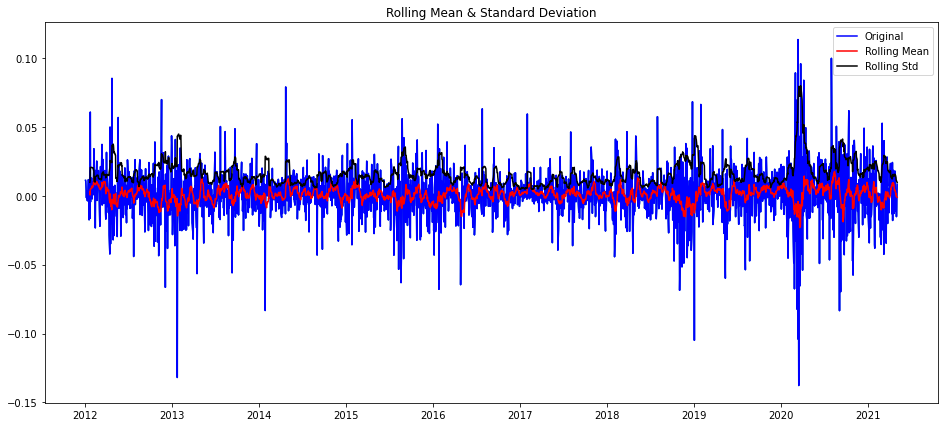

In [12]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [13]:
HCLTechStockData.sort_index(inplace= True)

In [14]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

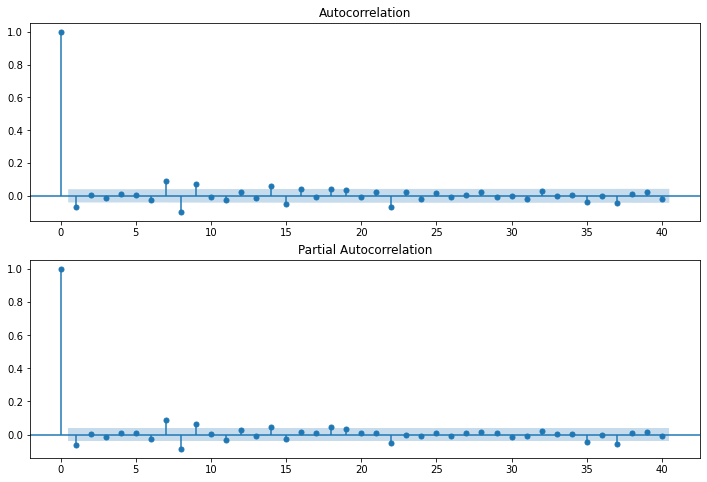

In [15]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
type(ts_log_diff)

pandas.core.series.Series

In [18]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


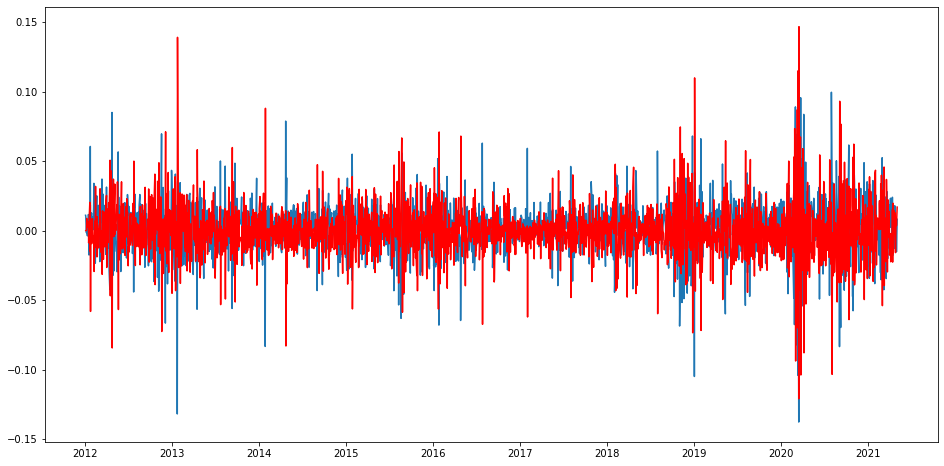

In [19]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(2,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

# Taking results back to original scale

In [20]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2012-01-06    2.131250e-08
2012-01-09    3.365893e-04
2012-01-10    8.810570e-03
2012-01-11    2.477091e-03
2012-01-12    6.272542e-03
dtype: float64


In [21]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2012-01-06    2.131250e-08
2012-01-09    3.366106e-04
2012-01-10    9.147181e-03
2012-01-11    1.162427e-02
2012-01-12    1.789681e-02
dtype: float64


In [22]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2012-01-04    2.692308
2012-01-05    2.692308
2012-01-06    2.692308
2012-01-09    2.692644
2012-01-10    2.701455
dtype: float64

Text(0.5, 1.0, 'RMSE: 35.9268')

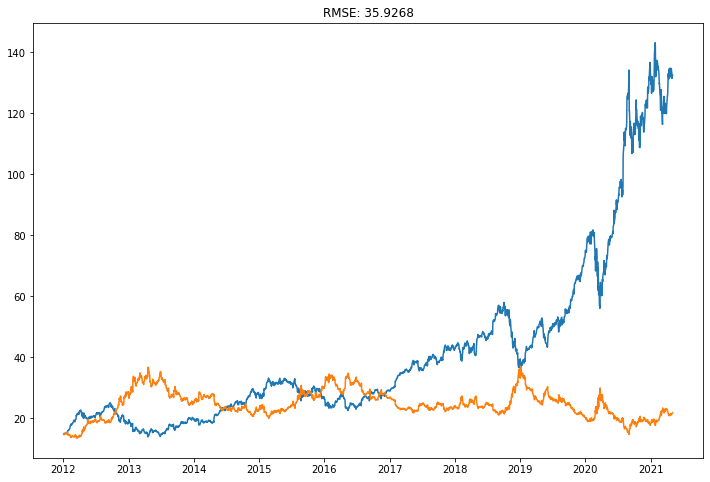

In [23]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [24]:
results_ARIMA.predict(10,20)

Date
2012-01-20    0.007100
2012-01-23    0.020328
2012-01-24   -0.014730
2012-01-25    0.018434
2012-01-26   -0.058117
2012-01-27    0.008390
2012-01-30    0.000447
2012-01-31   -0.009332
2012-02-01   -0.001149
2012-02-02    0.005095
2012-02-03    0.008646
dtype: float64

In [25]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [26]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-12146.227, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12147.660, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12155.697, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12155.618, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12143.440, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-12153.714, Time=1.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12153.730, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-12151.707, Time=1.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-12150.634, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 7.555 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)